<a href="https://colab.research.google.com/github/jpbeaud/OpenClassProjet/blob/main/principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_test = pd.read_csv('/test.csv')
df = pd.read_csv('/train.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0.0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1.0
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0.0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0.0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113168 entries, 0 to 113167
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113168 non-null  int64  
 1   Gender                113168 non-null  object 
 2   Age                   113168 non-null  int64  
 3   Driving_License       113168 non-null  int64  
 4   Region_Code           113168 non-null  float64
 5   Previously_Insured    113168 non-null  int64  
 6   Vehicle_Age           113168 non-null  object 
 7   Vehicle_Damage        113168 non-null  object 
 8   Annual_Premium        113168 non-null  float64
 9   Policy_Sales_Channel  113168 non-null  float64
 10  Vintage               113168 non-null  int64  
 11  Response              113167 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 10.4+ MB


In [ ]:
df.shape

(113168, 12)

on enlève les doublons

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(113168, 12)

Valeurs manquantes

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [ ]:
df['Vehicle_Damages'] = df['Vehicle_Damage'].apply(veh_a)
df.drop(['Vehicle_Damage'],axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damages
0,0,Male,21,1,35.0,0,1-2 Year,65101.0,124.0,187,0.0,1
1,1,Male,43,1,28.0,0,> 2 Years,58911.0,26.0,288,1.0,1
2,2,Female,25,1,14.0,1,< 1 Year,38043.0,152.0,254,0.0,0
3,3,Female,35,1,1.0,0,1-2 Year,2630.0,156.0,76,0.0,1
4,4,Female,36,1,15.0,1,1-2 Year,31951.0,152.0,294,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113163,113163,Male,25,1,45.0,1,< 1 Year,51763.0,152.0,257,0.0,0
113164,113164,Male,25,1,35.0,1,< 1 Year,46622.0,152.0,104,0.0,0
113165,113165,Female,39,1,7.0,0,1-2 Year,2630.0,124.0,119,0.0,1
113166,113166,Male,48,1,34.0,1,1-2 Year,29276.0,26.0,298,0.0,0


In [ ]:
df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
df = pd.get_dummies(df, columns=['Vehicle_Age'])
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damages,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,Male,21,1,35.0,0,Yes,65101.0,124.0,187,0.0,1,True,False,False
1,1,Male,43,1,28.0,0,Yes,58911.0,26.0,288,1.0,1,False,False,True
2,2,Female,25,1,14.0,1,No,38043.0,152.0,254,0.0,0,False,True,False
3,3,Female,35,1,1.0,0,Yes,2630.0,156.0,76,0.0,1,True,False,False
4,4,Female,36,1,15.0,1,No,31951.0,152.0,294,0.0,0,True,False,False


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Charger les données

data = pd.read_csv('https://github.com/DiouaneAbdallah/Regression-logistique-Python-Titanic/raw/main/titanic_train.csv')

In [2]:
# Prétraitement des données (simplifié)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Sélection des caractéristiques et de la cible
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

<ipython-input-2-b7d52263ee84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-2-b7d52263ee84>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

RandomForestClassifier(random_state=42)

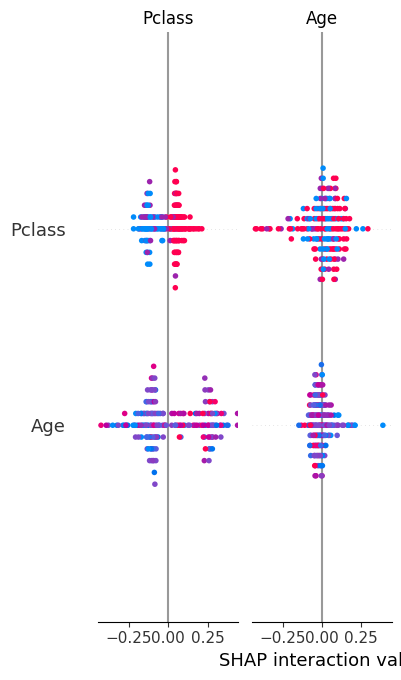

In [4]:
import shap

# Créer un explainer SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Résumé des valeurs SHAP
shap.summary_plot(shap_values, X_test, plot_type="bar")